<a href="https://colab.research.google.com/github/Phangzs/Housing_Prices_Predictor/blob/main/House_Prices_Advanced.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [10]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression

from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.model_selection import train_test_split

In [11]:
import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, Input

In [12]:
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.layers.experimental import preprocessing

In [13]:
train = pd.read_csv("/content/drive/MyDrive/New Colab Notebook/train.csv")
train = train.fillna(0)
features = ['OverallQual', 'GrLivArea']


# New Section

In [14]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [15]:
corr = train.corr()
corr["Importance"] = corr[["SalePrice"]].abs()
corr = corr[["Importance"]]
corr = corr.sort_values(by=["Importance"], ascending=False)
important_features = corr[corr.Importance>=0.2].index.tolist()

<ipython-input-15-e36ac38fc1e5>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = train.corr()


In [16]:
import seaborn as sns

In [17]:
train = train.dropna(subset=important_features)

<Axes: >

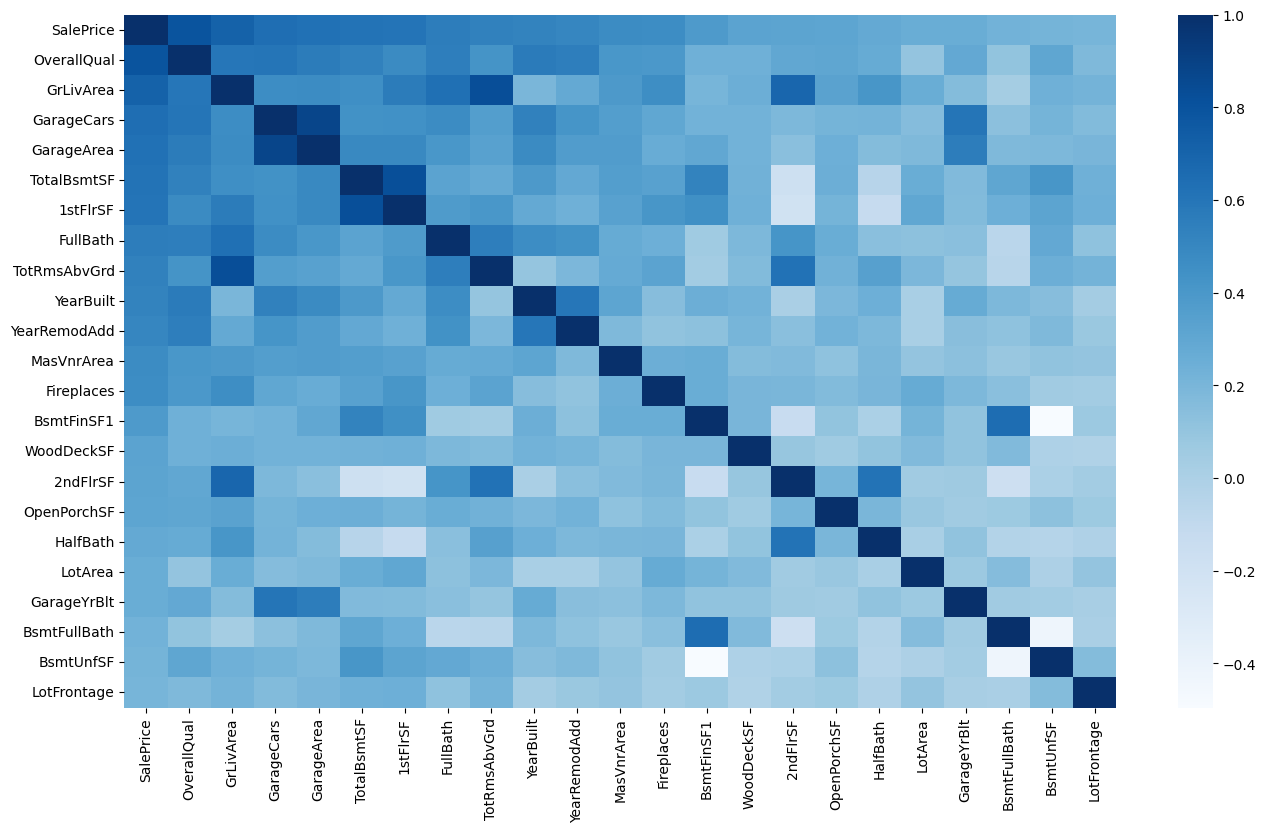

In [18]:
fig, ax = plt.subplots(figsize=(16, 9))
sns.heatmap(train[important_features].corr(), ax=ax, cmap="Blues")

In [19]:
features = ['OverallQual', '1stFlrSF','TotRmsAbvGrd', 'MasVnrArea']

In [20]:
tr_f = train[important_features]
X_train = tr_f.drop('SalePrice',axis=1)
X_train

,OverallQual,GrLivArea,GarageCars,GarageArea,TotalBsmtSF,1stFlrSF,FullBath,TotRmsAbvGrd,YearBuilt,YearRemodAdd,...,BsmtFinSF1,WoodDeckSF,2ndFlrSF,OpenPorchSF,HalfBath,LotArea,GarageYrBlt,BsmtFullBath,BsmtUnfSF,LotFrontage
0,7,1710,2,548,856,856,2,8,2003,2003,...,706,0,854,61,1,8450,2003.0,1,150,65.0
1,6,1262,2,460,1262,1262,2,6,1976,1976,...,978,298,0,0,0,9600,1976.0,0,284,80.0
2,7,1786,2,608,920,920,2,6,2001,2002,...,486,0,866,42,1,11250,2001.0,1,434,68.0
3,7,1717,3,642,756,961,1,7,1915,1970,...,216,0,756,35,0,9550,1998.0,1,540,60.0
4,8,2198,3,836,1145,1145,2,9,2000,2000,...,655,192,1053,84,1,14260,2000.0,1,490,84.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,6,1647,2,460,953,953,2,7,1999,2000,...,0,0,694,40,1,7917,1999.0,0,953,62.0
1456,6,2073,2,500,1542,2073,2,7,1978,1988,...,790,349,0,0,0,13175,1978.0,1,589,85.0
1457,7,2340,1,252,1152,1188,2,9,1941,2006,...,275,0,1152,60,0,9042,1941.0,0,877,66.0
1458,5,1078,1,240,1078,1078,1,5,1950,1996,...,49,366,0,0,0,9717,1950.0,1,0,68.0


In [21]:
test = pd.read_csv("/content/drive/MyDrive/New Colab Notebook/test.csv")
test = test[important_features[1:]]
X_test = test
print(test)

      OverallQual  GrLivArea  GarageCars  GarageArea  TotalBsmtSF  1stFlrSF  \
0               5        896         1.0       730.0        882.0       896   
1               6       1329         1.0       312.0       1329.0      1329   
2               5       1629         2.0       482.0        928.0       928   
3               6       1604         2.0       470.0        926.0       926   
4               8       1280         2.0       506.0       1280.0      1280   
...           ...        ...         ...         ...          ...       ...   
1454            4       1092         0.0         0.0        546.0       546   
1455            4       1092         1.0       286.0        546.0       546   
1456            5       1224         2.0       576.0       1224.0      1224   
1457            5        970         0.0         0.0        912.0       970   
1458            7       2000         3.0       650.0        996.0       996   

      FullBath  TotRmsAbvGrd  YearBuilt  YearRemodA

In [22]:
y_train = train['SalePrice']
print(X_train.shape, X_test.shape, y_train.shape)

(1460, 22) (1459, 22) (1460,)


In [23]:
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.3, random_state=1)
print(X_train.shape, X_val.shape, y_train.shape, y_val.shape)

(1022, 22) (438, 22) (1022,) (438,)


# Scaling

In [24]:
normalizer = preprocessing.Normalization()

In [25]:
normalizer.adapt(np.array(X_train))
      #  layers.Dense(4, activation='relu'),

In [26]:
def scheduler(epoch, lr):
    if epoch > 100 and epoch % 100 == 0:
        return lr * tf.math.exp(-0.1)
    else:
        return lr

In [27]:
def build_and_compile_model(norm):
    model = keras.Sequential([
        norm,
        layers.Dropout(0.2),
        layers.Dense(64, activation='relu'),
        layers.Dropout(0.2),
        layers.Dense(64, activation='relu'),
        layers.Dropout(0.2),
        layers.Dense(1, activation="relu")
    ])
    model.compile(loss='mean_absolute_error',
#                   optimizer=keras.optimizers.SGD(learning_rate=2)
                optimizer=keras.optimizers.Adam(0.01)
                 )
    return model

In [28]:
dnn_model = build_and_compile_model(normalizer)
dnn_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 normalization (Normalizati  (None, 22)                45        
 on)                                                             
                                                                 
 dropout (Dropout)           (None, 22)                0         
                                                                 
 dense (Dense)               (None, 64)                1472      
                                                                 
 dropout_1 (Dropout)         (None, 64)                0         
                                                                 
 dense_1 (Dense)             (None, 64)                4160      
                                                                 
 dropout_2 (Dropout)         (None, 64)                0         
                                                        

In [29]:
def plot_loss(history, start=0):
    plt.plot(history.history['loss'][start:], label='loss')
    plt.plot(history.history['val_loss'][start:], label='val_loss')
    plt.xlabel('Epoch')
    plt.ylabel('Error [MPG]')
    plt.legend()
    plt.grid(True)

In [30]:
lr_schedule = keras.callbacks.LearningRateScheduler(scheduler)
earlystopping = keras.callbacks.EarlyStopping(patience=50)
history = dnn_model.fit(
    X_train, y_train,
    validation_split=0.2,
    batch_size=len(train),
    verbose=1, epochs=4000,
    callbacks=[lr_schedule, earlystopping]
)

Epoch 1/4000
1/1 [==============================] - 1s 1s/step - loss: 182260.5312 - val_loss: 178160.1562 - lr: 0.0100
Epoch 2/4000
1/1 [==============================] - 0s 50ms/step - loss: 182259.2188 - val_loss: 178158.7656 - lr: 0.0100
Epoch 3/4000
1/1 [==============================] - 0s 41ms/step - loss: 182257.7031 - val_loss: 178157.1562 - lr: 0.0100
Epoch 4/4000
1/1 [==============================] - 0s 41ms/step - loss: 182256.0469 - val_loss: 178155.1875 - lr: 0.0100
Epoch 5/4000
1/1 [==============================] - 0s 42ms/step - loss: 182254.0000 - val_loss: 178152.8750 - lr: 0.0100
Epoch 6/4000
1/1 [==============================] - 0s 43ms/step - loss: 182251.5781 - val_loss: 178150.1094 - lr: 0.0100
Epoch 7/4000
1/1 [==============================] - 0s 42ms/step - loss: 182248.5625 - val_loss: 178146.7656 - lr: 0.0100
Epoch 8/4000
1/1 [==============================] - 0s 48ms/step - loss: 182245.1250 - val_loss: 178142.8438 - lr: 0.0100
Epoch 9/4000
1/1 [========

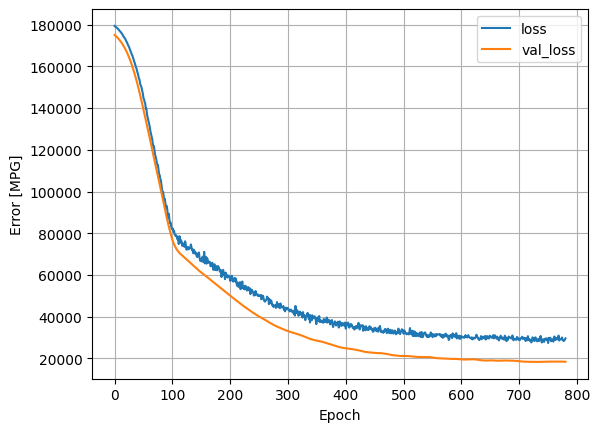

In [31]:
plot_loss(history, start=50)

In [32]:
y_pred = dnn_model.predict(X_test)
y_pred

46/46 [==============================] - 0s 1ms/step


array([[117425.484],
       [139832.44 ],
       [172933.44 ],
       ...,
       [193147.67 ],
       [       nan],
       [234506.73 ]], dtype=float32)

In [33]:
subm = test[['OverallQual']]
subm['SalePrice'] = y_pred
subm

<ipython-input-33-4e0d857f1426>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  subm['SalePrice'] = y_pred


,OverallQual,SalePrice
0,5,117425.484375
1,6,139832.437500
2,5,172933.437500
3,6,186324.500000
4,8,171844.828125
...,...,...
1454,4,NaN
1455,4,100275.414062
1456,5,193147.671875
1457,5,NaN


In [34]:
subm.to_csv("submission_18_0106.csv", index = None)